In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
import os, sys, random
import xml.etree.ElementTree as ET 
from glob import glob 
import pandas as pd 
from shutil import copyfile 
import pandas as pd 


annotations = glob('E:\kaggle\BCCD_Dataset\BCCD\Annotations\*.xml') 
df = pd.DataFrame(columns=['prev_filename', 'filename', 'cell_type','xmin', 'xmax', 'ymin', 'ymax']) 
cnt = 0 
for file in annotations: 
    prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
    filename = str(cnt) + '.jpg'
    row = [] 
    parsedXML = ET.parse(file) 
    for node in parsedXML.getroot().iter('object'): 
        blood_cells = node.find('name').text 
        xmin = int(node.find('bndbox/xmin').text) 
        xmax = int(node.find('bndbox/xmax').text) 
        ymin = int(node.find('bndbox/ymin').text) 
        ymax = int(node.find('bndbox/ymax').text) 
        row = [prev_filename, filename, blood_cells, xmin, xmax,ymin, ymax] 
        df = df.append({'prev_filename':prev_filename,
                        'filename':filename,
                        'cell_type':blood_cells,
                        'xmin':xmin,
                        'xmax':xmax,
                        'ymin':ymin,
                        'ymax':ymax
                       },
                       ignore_index=True) 
    cnt += 1 

In [3]:
print(cnt)

364


In [4]:
df.head()

,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax
0,E:\kaggle\BCCD_Dataset\BCCD\Annotations\BloodI...,0.jpg,WBC,260,491,177,376
1,E:\kaggle\BCCD_Dataset\BCCD\Annotations\BloodI...,0.jpg,RBC,78,184,336,435
2,E:\kaggle\BCCD_Dataset\BCCD\Annotations\BloodI...,0.jpg,RBC,63,169,237,336
3,E:\kaggle\BCCD_Dataset\BCCD\Annotations\BloodI...,0.jpg,RBC,214,320,362,461
4,E:\kaggle\BCCD_Dataset\BCCD\Annotations\BloodI...,0.jpg,RBC,414,506,352,445


In [5]:
df['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train_val_files, X_test_files = train_test_split(df['filename'].unique(), test_size=0.2, random_state=42)

In [8]:
X_train_files, X_val_files = train_test_split(X_train_val_files, test_size=0.2, random_state=42)

In [9]:
X_train = df[df['filename'].isin(X_train_files)]
X_val = df[df['filename'].isin(X_val_files)]
X_test = df[df['filename'].isin(X_test_files)]

In [10]:
X_train['cell_type'].value_counts(normalize=True)

RBC          0.850133
WBC          0.078249
Platelets    0.071618
Name: cell_type, dtype: float64

In [11]:
X_val['cell_type'].value_counts(normalize=True)

RBC          0.871703
WBC          0.074341
Platelets    0.053957
Name: cell_type, dtype: float64

In [12]:
X_test['cell_type'].value_counts(normalize=True)

RBC          0.832370
Platelets    0.096339
WBC          0.071291
Name: cell_type, dtype: float64

In [13]:
X_train.to_csv(r"E:\kaggle\keras-frcnn\train.csv", index=False)
X_val.to_csv(r"E:\kaggle\keras-frcnn\val.csv", index=False)
X_test.to_csv(r"E:\kaggle\keras-frcnn\test.csv", index=False)

In [14]:
df['prev_filename'].values[0]

'E:\\kaggle\\BCCD_Dataset\\BCCD\\Annotations\\BloodImage_00000.jpg'

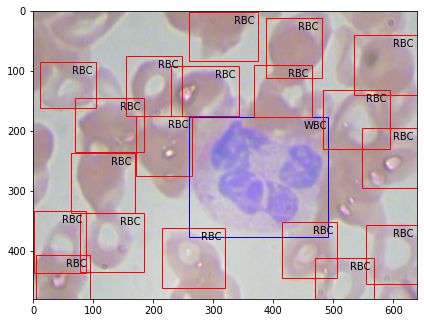

In [15]:


fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread(r'E:\kaggle\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00000.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.filename == "0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [16]:
# Copy Training images to train_images folder
for prev_filename in X_train['prev_filename'].unique():
    filename = prev_filename.split("\\")[-1]
    orig_file_path = os.path.join(r"E:\kaggle\BCCD_Dataset\BCCD\JPEGImages", filename)
    des_file_path = os.path.join(r"E:\kaggle\keras-frcnn\train_images", filename)
    copyfile(orig_file_path, des_file_path)
    
# Copy Validation images to valid_images folder
for prev_filename in X_val['prev_filename'].unique():
    filename = prev_filename.split("\\")[-1]
    orig_file_path = os.path.join(r"E:\kaggle\BCCD_Dataset\BCCD\JPEGImages", filename)
    des_file_path = os.path.join(r"E:\kaggle\keras-frcnn\valid_images", filename)
    copyfile(orig_file_path, des_file_path)
    
# Copy Testing images to test_images folder
for prev_filename in X_test['prev_filename'].unique():
    filename = prev_filename.split("\\")[-1]
    orig_file_path = os.path.join(r"E:\kaggle\BCCD_Dataset\BCCD\JPEGImages", filename)
    des_file_path = os.path.join(r"E:\kaggle\keras-frcnn\test_images", filename)
    copyfile(orig_file_path, des_file_path)

In [17]:
data = pd.DataFrame()

# add filepath,xmin, ymin, xmax, ymax and class as per the format required
data['format'] = 'train_images\\' + X_train['prev_filename'].str.split("\\").apply(lambda x: x[-1]) + ',' + \
                X_train['xmin'].astype(str) + ',' + X_train['ymin'].astype(str) + ',' + \
                X_train['xmax'].astype(str) + ',' + X_train['ymax'].astype(str) + ',' + \
                X_train['cell_type']

data.to_csv(r'E:\kaggle\keras-frcnn\train_annotate.txt', header=None, index=None, sep=' ')

In [18]:
data = pd.DataFrame()

# add filepath,xmin, ymin, xmax, ymax and class as per the format required
data['format'] = 'valid_images\\' + X_val['prev_filename'].str.split("\\").apply(lambda x: x[-1]) + ',' + \
                X_val['xmin'].astype(str) + ',' + X_val['ymin'].astype(str) + ',' + \
                X_val['xmax'].astype(str) + ',' + X_val['ymax'].astype(str) + ',' + \
                X_val['cell_type']

data.to_csv(r'E:\kaggle\keras-frcnn\val_annotate.txt', header=None, index=None, sep=' ')

In [19]:

from tensorflow.keras import backend as k
k.image_data_format()

'channels_last'

In [22]:
help(k.image_data_format)

Help on function image_data_format in module tensorflow.python.keras.backend_config:

image_data_format()
    Returns the default image data format convention.
    
    Returns:
        A string, either `'channels_first'` or `'channels_last'`
    
    Example:
    >>> tf.keras.backend.image_data_format()
    'channels_last'

